# Proyecto GoGreen Bikesharing

### Cargamos las librerias 

In [11]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

---

### Cargamos los datos facilitados

In [12]:
df = pd.read_csv("../../datos/00-bikes.csv", index_col=0)
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


Facilitamos unas funciones para la apertura de archivos y guardado :

In [13]:
def apertura_archivo (nombre_archivo):
    ruta = 'datos/' + nombre_archivo
    df_csv = pd.read_csv(ruta, index_col = 0)
    return df_csv

In [14]:
def guardar_archivo (nombre_archivo,nombre_guardado):
    return nombre_archivo.to_csv(nombre_guardado)

### Primera aproximación a los datos

In [15]:
print(f'Las columnas de este df son:') 
df.info()

Las columnas de este df son:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [16]:
print(f'Las columnas de este df son:') 
df.columns

Las columnas de este df son:


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Vemos que todos los nombres son iguales, sin espacios y en minusculas.Planteamos una función por si los **próximos** datos tuvieran que unificarse con esto.

In [17]:
def unificar_col (df): 
    lista_columnas = {col: col.strip().replace(" ", "_").lower() for col in df.columns}
    return df.rename(columns=lista_columnas, inplace=True)

In [18]:
print(f'Las columnas y filas de este df son: {df.shape}')

Las columnas y filas de este df son: (730, 16)


In [19]:
print(f'Los tipos de datos de este df son:') 
df.dtypes

Los tipos de datos de este df son:


instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Principales estadisticos de las columnas

In [20]:
# para las variables numéricas
print(f'Los principales estadisticos de las columnas NÚMERICAS de este df son:') 
df.describe().T # el .T nos transpone el resultado del describe

Los principales estadisticos de las columnas NÚMERICAS de este df son:


,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [21]:
# para las variables categóricas
#print(f'Los principales estadisticos de las columnas CATEGÓRICAS de este df son:') 
#df.describe(include="object")

# Duplicados

In [22]:
print(f'Los duplicados de este df son:{df.duplicated().sum()}') 

Los duplicados de este df son:0


In [23]:
print(f'Los duplicados de este df son:')
pd.DataFrame(df.isnull().sum())

Los duplicados de este df son:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [24]:
print(f'Los duplicados de este df son:')
pd.DataFrame(df.isna().sum())

Los duplicados de este df son:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# Nulos

In [25]:
print(f'Los nulos de este df son:')
df.stb.missing()

Los nulos de este df son:


,missing,total,percent
instant,0,730,0.0
dteday,0,730,0.0
season,0,730,0.0
yr,0,730,0.0
mnth,0,730,0.0
holiday,0,730,0.0
weekday,0,730,0.0
workingday,0,730,0.0
weathersit,0,730,0.0
temp,0,730,0.0


# Categóricas

In [26]:
# los valores unicos y sus frecuencias
def frecuencias(col):
    return pd.DataFrame(df[col].value_counts())

In [27]:
frecuencias('instant')

,instant
1,1
480,1
482,1
483,1
484,1
...,...
246,1
247,1
248,1
249,1


In [28]:
frecuencias('dteday')

,dteday
01-01-2018,1
25-04-2019,1
27-04-2019,1
28-04-2019,1
29-04-2019,1
...,...
03-09-2018,1
04-09-2018,1
05-09-2018,1
06-09-2018,1


In [29]:
frecuencias('season')

,season
autumn,188
summer,184
spring,180
winter,178


In [30]:
frecuencias('yr')

,yr
0,365
1,365


In [31]:
frecuencias('mnth')

,mnth
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60
9,60


In [32]:
frecuencias('holiday')

,holiday
0,709
1,21


In [33]:
frecuencias('weekday')

,weekday
6,105
0,105
1,105
2,104
4,104
5,104
3,103


In [34]:
frecuencias('workingday')

,workingday
1,499
0,231


In [35]:
frecuencias('weathersit')

,weathersit
1,463
2,246
3,21


In [36]:
frecuencias('temp')

,temp
26.035000,5
10.899153,5
27.880000,4
28.563347,4
23.130847,4
...,...
27.435847,1
26.376653,1
28.989419,1
28.700000,1


In [37]:
frecuencias('atemp')

,atemp
32.73440,4
18.78105,3
31.85040,3
28.59875,2
23.32625,2
...,...
28.94730,1
30.46145,1
30.10650,1
31.34500,1


In [38]:
frecuencias('hum')

,hum
61.3333,4
63.0833,3
55.2083,3
60.5000,3
56.8333,3
...,...
54.8333,1
56.1765,1
85.0000,1
76.1250,1


In [39]:
frecuencias('windspeed')

,windspeed
9.041918,3
11.166689,3
11.250104,3
15.333486,3
7.959064,3
...,...
12.416775,1
13.833289,1
14.250632,1
23.044181,1


In [40]:
frecuencias('casual')

,casual
120,4
968,4
639,3
163,3
775,3
...,...
2521,1
1935,1
783,1
688,1


In [41]:
frecuencias('registered')

,registered
4841,3
6248,3
1707,3
3461,2
2713,2
...,...
4138,1
3231,1
4018,1
3077,1


In [42]:
frecuencias('cnt')

,cnt
5409,2
2424,2
5698,2
4459,2
5119,2
...,...
5345,1
5046,1
4713,1
4763,1


In [43]:
# para sacar solo los valores únicos 
def valores_unicos(col):
    return pd.DataFrame(df[col].unique())

In [44]:
valores_unicos('dteday')

,0
0,01-01-2018
1,02-01-2018
2,03-01-2018
3,04-01-2018
4,05-01-2018
...,...
725,27-12-2019
726,28-12-2019
727,29-12-2019
728,30-12-2019


In [45]:
valores_unicos('season')

,0
0,spring
1,summer
2,autumn
3,winter


In [46]:
valores_unicos('yr')

,0
0,0
1,1


In [47]:
valores_unicos('mnth')

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [48]:
valores_unicos('holiday')

,0
0,0
1,1


In [49]:
valores_unicos('weekday')

,0
0,6
1,0
2,1
3,2
4,3
5,4
6,5


In [50]:
valores_unicos('workingday')

,0
0,0
1,1


In [51]:
valores_unicos('weathersit')

,0
0,2
1,1
2,3


In [52]:
valores_unicos('temp')

,0
0,14.110847
1,14.902598
2,8.050924
3,8.200000
4,9.305237
...,...
493,13.530000
494,9.483464
495,11.943464
496,10.386653


In [53]:
valores_unicos('atemp')

,0
0,18.18125
1,17.68695
2,9.47025
3,10.60610
4,11.46350
...,...
684,11.01665
685,11.33210
686,12.75230
687,11.58500


In [54]:
valores_unicos('hum')

,0
0,80.5833
1,69.6087
2,43.7273
3,59.0435
4,43.6957
...,...
589,51.5417
590,79.1304
591,73.4783
592,65.2917


In [55]:
valores_unicos('windspeed')

,0
0,10.749882
1,16.652113
2,16.636703
3,10.739832
4,12.522300
...,...
644,21.208582
645,23.458911
646,8.333661
647,23.500518


In [56]:
valores_unicos('casual')

,0
0,331
1,131
2,120
3,108
4,82
...,...
600,314
601,205
602,408
603,159


In [57]:
valores_unicos('registered')

,0
0,654
1,670
2,1229
3,1454
4,1518
...,...
673,1867
674,2451
675,1182
676,1432


In [58]:
valores_unicos('cnt')

,0
0,985
1,801
2,1349
3,1562
4,1600
...,...
690,2114
691,3095
692,1341
693,1796


# Hacemos unos df con las variables numericas y categoricas

In [59]:
# Creamos un dataframe nuevo con las variables categóricas
df_categoricas = df.select_dtypes(include = "object")
df_categoricas.head(2)

,dteday,season
0,01-01-2018,spring
1,02-01-2018,spring


In [60]:
# Creamos un dataframe nuevo con las variables numéricas
df_numericas = df.select_dtypes(np.number)
df_numericas.head(2)

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


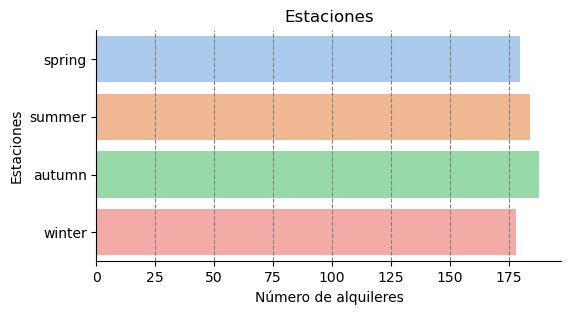

In [61]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = df["season"], data = df, palette='pastel')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Estaciones')
plt.xlabel('Número de alquileres')
plt.ylabel('Estaciones')
plt.show();

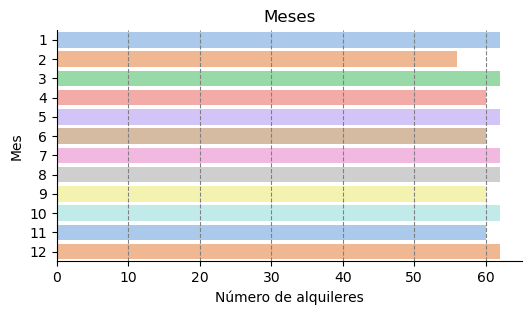

In [62]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = df["mnth"], data = df, palette='pastel')

plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Meses')
plt.xlabel('Número de alquileres')
plt.ylabel('Mes')
plt.show();

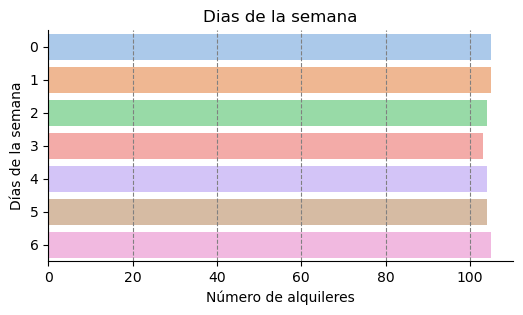

In [63]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = df["weekday"], data = df, palette='pastel')

plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Dias de la semana')
plt.xlabel('Número de alquileres')
plt.ylabel('Días de la semana')
plt.show();

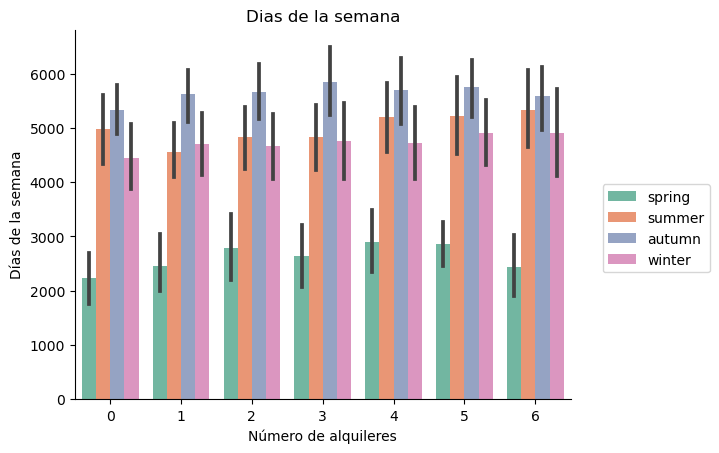

In [64]:
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.barplot(x='weekday', y='cnt', hue='season', data=df, palette='Set2');
plt.title('Dias de la semana')
plt.xlabel('Número de alquileres')
plt.ylabel('Días de la semana')
# colocar la leyenda fuera de la esquina inferior derecha de la 
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show();

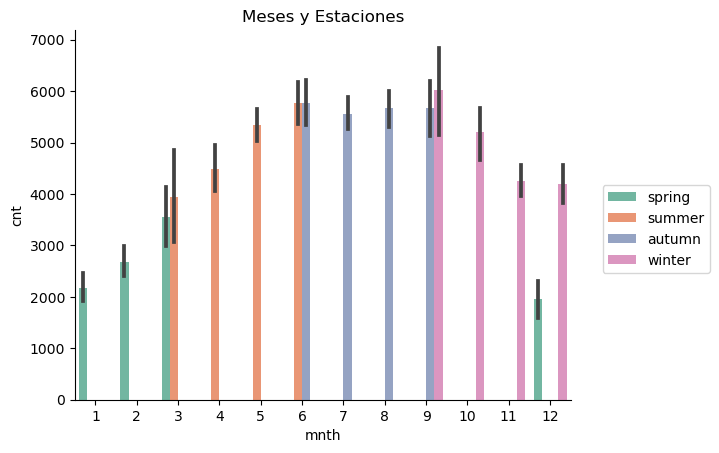

In [65]:
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#------------------------------------------
plt.title('Meses y Estaciones')
plt.xlabel('Meses')
plt.ylabel('Alquileres')
#-----------------------------------------
sns.barplot(x='mnth', y='cnt', hue='season', data=df, palette='Set2')
#-----------------------------------------------
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show();

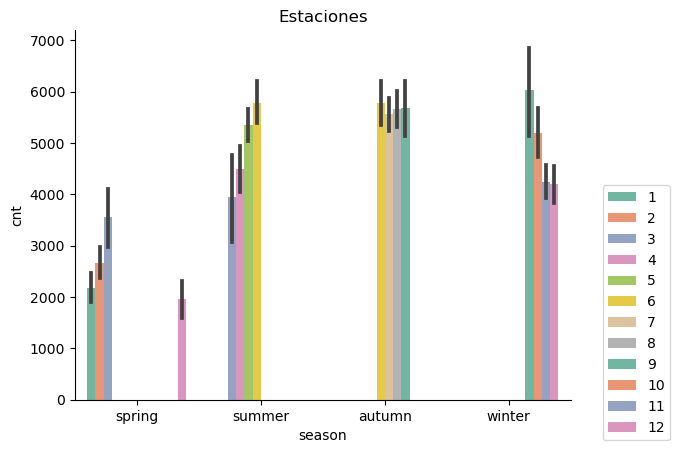

In [66]:
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#------------------------------------------
plt.title('Estaciones')
plt.xlabel('Estaciones')
plt.ylabel('Alquileres')

sns.barplot(x='season', y='cnt', hue='mnth', data=df, palette='Set2')
#-----------------------------------------------
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show();

---

# Outliers

Los identificamos visualmente

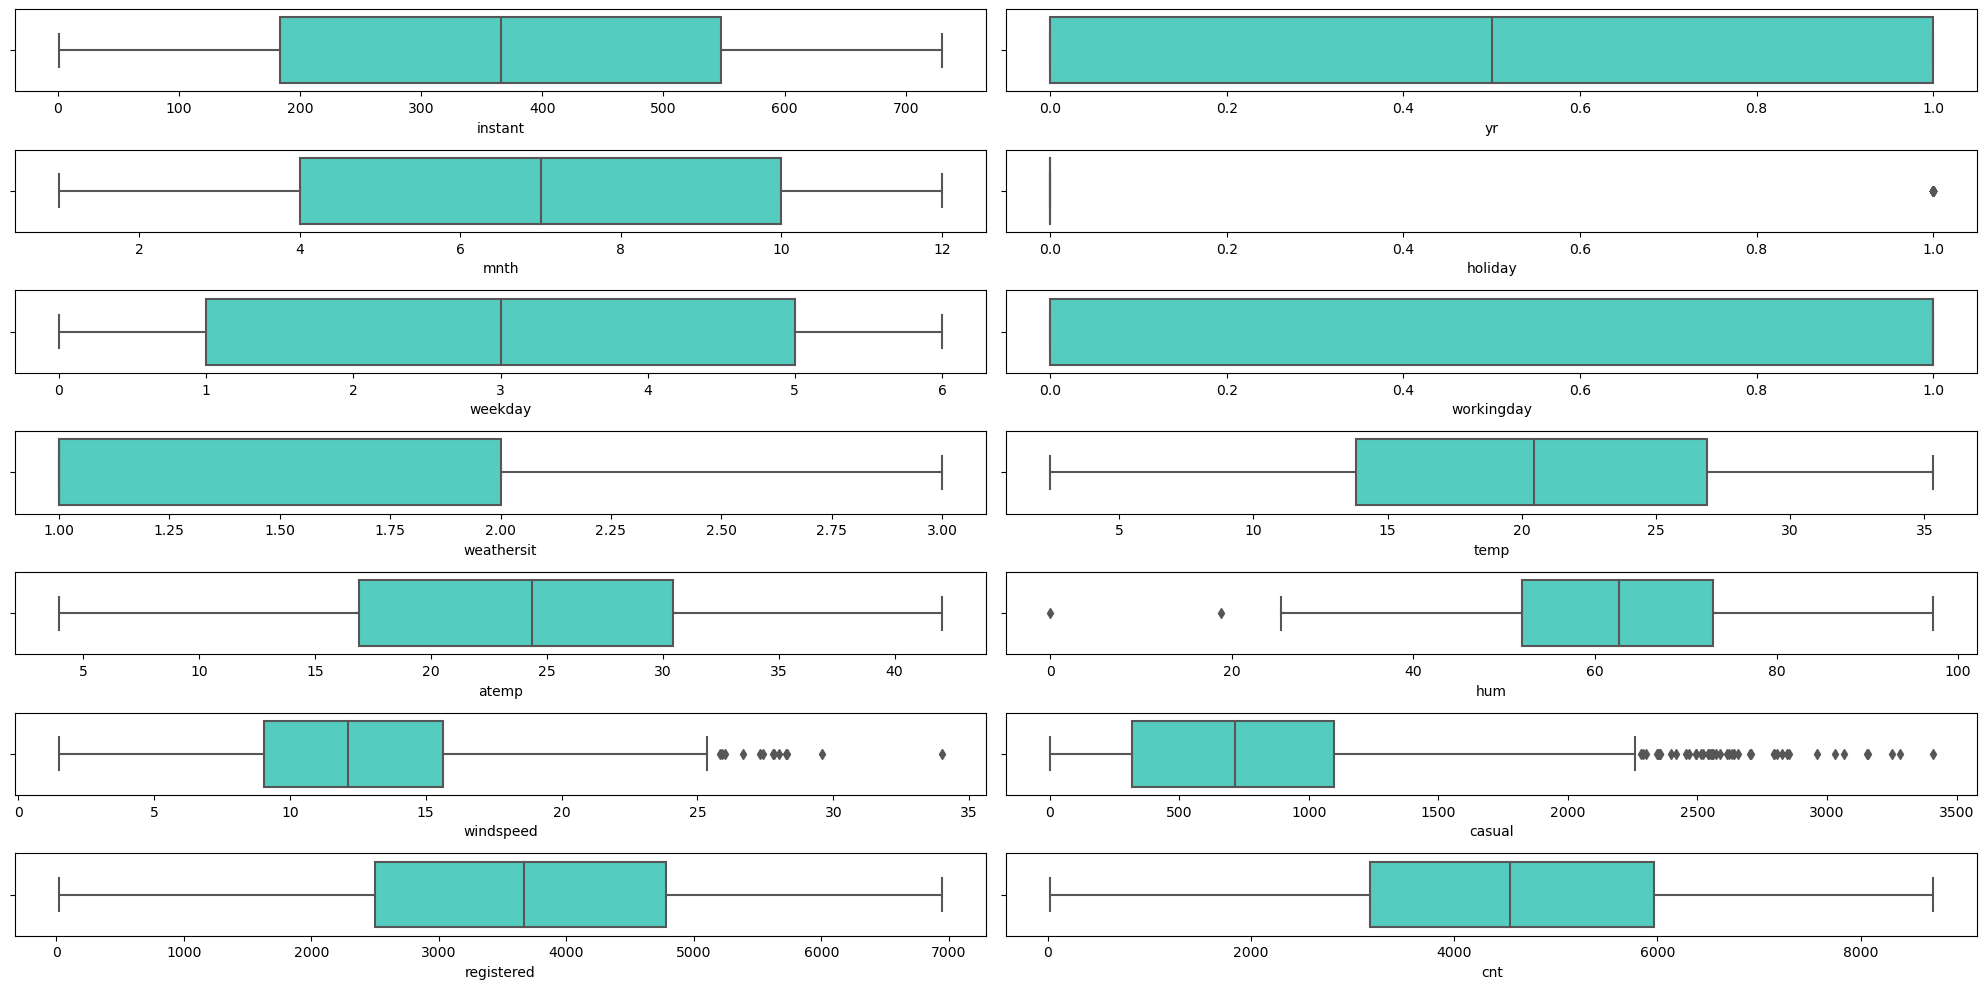

In [67]:
fig, axes = plt.subplots(7,2, figsize=(20,10))
axes = axes.flat
for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad
plt.tight_layout()
plt.show();

In [68]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Detectamos los outliers analiticamente

In [69]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas: 
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    return dicc_indices

In [70]:
df.shape

(730, 16)

In [71]:
columnas_numericas = list(df_numericas.columns)
columnas_numericas

['instant',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [72]:
ind= indices_outliers = detectar_outliers(columnas_numericas, df)

In [73]:
# en que columnas nos hemos encontrado con outliers? 
ind.keys()

dict_keys(['holiday', 'hum', 'windspeed', 'casual'])

Creamos un df solo con estas columnas

In [74]:
df_outlier=df.copy()

In [75]:
df_outlier.drop(['instant', 'dteday', 
                    'season', 'yr', 'mnth', 
                    'weekday','workingday', 'weathersit', 
                    'temp', 'atemp', 'registered', 'cnt','holiday','hum','windspeed'],axis=1,inplace=True)


In [76]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [77]:
df_outlier.head(2)

,casual
0,331
1,131


In [78]:
Q1_casual = np.nanpercentile(df['casual'], 25)
Q3_casual = np.nanpercentile(df['casual'], 75)
IQR_casual = Q3_casual - Q1_casual
outlier_step_casual = 1.5 * IQR_casual
        

In [79]:
outliers_data = df[(df['casual'] < Q1_casual- outlier_step_casual) | (df['casual'] > Q3_casual + outlier_step_casual)]

In [80]:
outliers_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
148,149,29-05-2018,summer,0,5,0,0,0,1,27.367500,30.77750,81.8750,14.333846,2355,2433,4788
183,184,03-07-2018,autumn,0,7,0,0,0,2,29.383347,33.42875,68.2500,15.333486,2282,2367,4649
184,185,04-07-2018,autumn,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
196,197,16-07-2018,autumn,0,7,0,6,0,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
246,247,04-09-2018,autumn,0,9,0,0,0,1,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
281,282,09-10-2018,winter,0,10,0,0,0,1,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
440,441,17-03-2019,spring,1,3,0,6,0,2,21.080847,25.25230,75.5833,7.417168,3155,4681,7836
446,447,23-03-2019,summer,1,3,0,5,1,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
454,455,31-03-2019,summer,1,3,0,6,0,2,17.390847,21.08540,73.8333,16.791339,2301,3934,6235
455,456,01-04-2019,summer,1,4,0,0,0,2,17.459153,20.86435,67.6250,11.541889,2347,3694,6041


In [81]:
outliers_data.shape

(44, 16)

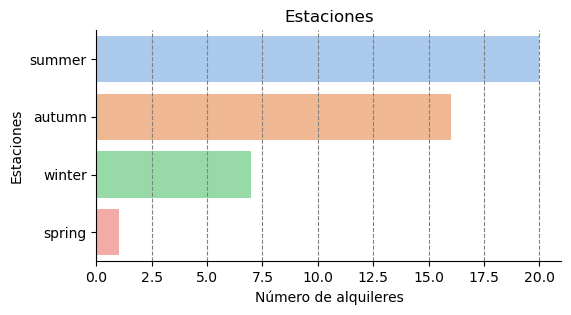

In [82]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = outliers_data["season"], data = outliers_data, palette='pastel')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Estaciones')
plt.xlabel('Número de alquileres')
plt.ylabel('Estaciones')
plt.show();

In [83]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


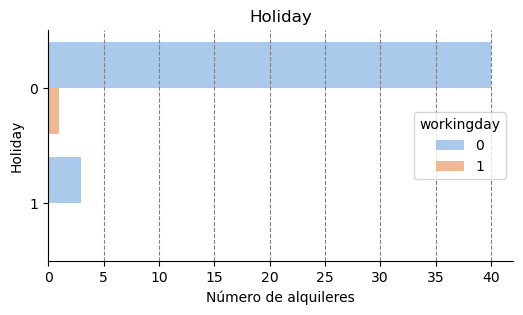

In [84]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = outliers_data["holiday"], data = outliers_data, palette='pastel', hue= 'workingday')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Holiday')
plt.xlabel('Número de alquileres')
plt.ylabel('Holiday')
plt.show();

In [85]:
df.groupby("weekday")['casual'].sum()

weekday
0    140521
1     70784
2     57843
3     57254
4     61460
5     78238
6    153852
Name: casual, dtype: int64

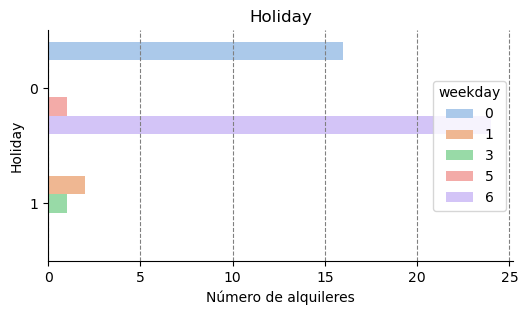

In [86]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = outliers_data["holiday"], data = outliers_data, palette='pastel', hue= 'weekday')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Holiday')
plt.xlabel('Número de alquileres')
plt.ylabel('Holiday')
plt.show();

Decidimos que hacer con los outliers.

# HEMOS DECIDIDO NO HACER NADA 

---

Vamos a ver un poco mejor nuestras variables numericas y sus distribuciones para ver como tratamos los outliers

In [87]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (100, 80))
axes = axes.flat#iterador

for i, colum in enumerate(df_numericas.columns): 
    sns.histplot(
        data = df_numericas[colum],
        kde = True,
        color = "green", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

# Nos planteamos si las columnas tienen el tipo adecuado pra los datos que contienen

In [88]:
print(f'Vemos este df :') 
df.sample(5)

Vemos este df :


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
256,257,14-09-2018,autumn,0,9,0,3,1,1,27.606653,31.34500,69.7083,11.209100,647,4138,4785
167,168,17-06-2018,summer,0,6,0,5,1,1,26.615847,30.01915,73.5833,9.582943,863,3981,4844
147,148,28-05-2018,summer,0,5,0,6,0,1,26.889153,30.61895,72.9583,15.416164,2001,2757,4758
460,461,06-04-2019,summer,1,4,0,5,1,1,16.536653,19.53835,37.7083,20.125996,1807,4653,6460
435,436,12-03-2019,spring,1,3,0,1,1,1,19.133347,22.97960,48.9167,13.916771,838,4460,5298


In [89]:
print(f'Las columnas de este df son:') 
df.info()

Las columnas de este df son:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


- Vemos que la columna dteday en objet pero contiene fechas.

`A la vista de los outliers de la columna 'casual' hemos decidido separar los mismo a otro dataframe para su posterior analisis, ya que no arrojaban datos relevantes para el analisis general. Trataremos de averiguar que patron siguen para su analisis.`

In [90]:
outliers_data.to_pickle('datos/df_outliers.pk')

OSError: Cannot save file into a non-existent directory: 'datos'

Vamos a eliminar de nuestro Dataset las filas que corresponden a los outliers de 'casual' parea poder continuar analizandolo.

In [ ]:
indices_casual=ind['casual']

In [ ]:
df.drop(indices_casual, axis=0, inplace=True)



In [ ]:
df.reset_index()

,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2,3,2018-01-03,invierno,0,1,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,3,4,2018-01-04,invierno,0,1,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,4,5,2018-01-05,invierno,0,1,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,725,726,2019-12-27,invierno,1,12,no festivo,5,laborable,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
682,726,727,2019-12-28,invierno,1,12,no festivo,6,finde,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
683,727,728,2019-12-29,invierno,1,12,no festivo,7,finde,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
684,728,729,2019-12-30,invierno,1,12,no festivo,1,laborable,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
df.shape 

(686, 16)

In [ ]:
numericas2= df.select_dtypes(np.number)

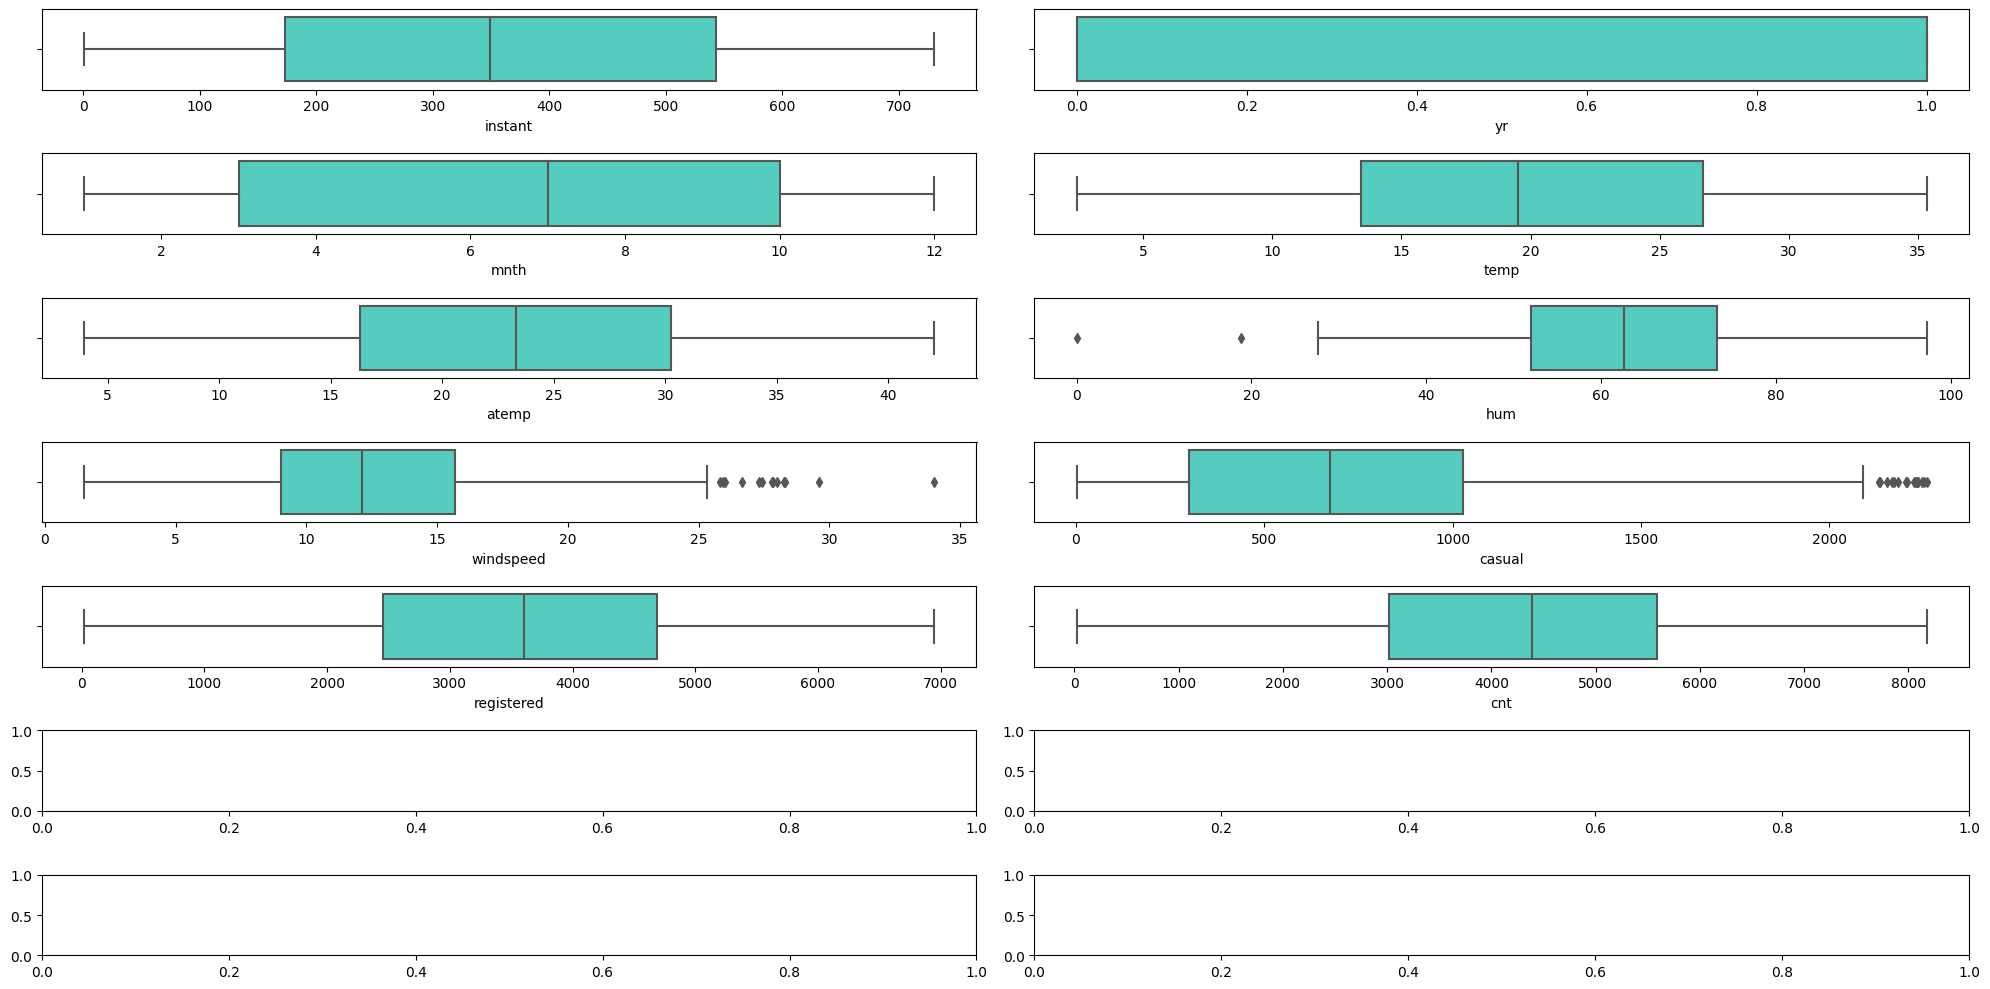

In [ ]:
fig, axes = plt.subplots(7,2, figsize=(20,10))
axes = axes.flat
for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad
plt.tight_layout()
plt.show();

Ya hemos eliminado las filas de los outliers, asique procedemos a guardar el Dataframe.

---

In [ ]:
indices_windspeed= ind['windspeed']
indices_windspeed

[44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]

In [ ]:
Q1_wind = np.nanpercentile(df['windspeed'], 25)
Q3_wind = np.nanpercentile(df['windspeed'], 75)
IQR_wind = Q3_wind - Q1_wind
outlier_step_wind = 1.5 * IQR_wind

In [ ]:
outliers_data_wind = df[(df['windspeed'] < Q1_wind- outlier_step_wind) | (df['windspeed'] > Q3_wind + outlier_step_wind)]
outliers_data_wind


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2018-02-14,invierno,0,2,no festivo,3,laborable,1,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,50,2018-02-19,invierno,0,2,festivo,1,laborable,1,16.365847,19.57020,18.7917,34.000021,532,1103,1635
93,94,2018-04-04,primavera,0,4,no festivo,3,laborable,1,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,95,2018-04-05,primavera,0,4,no festivo,4,laborable,2,16.980847,19.91750,64.2083,26.000489,167,1628,1795
292,293,2018-10-20,otoño,0,10,no festivo,6,finde,1,19.509153,23.32625,63.6250,28.292425,471,3724,4195
382,383,2019-01-18,invierno,1,1,no festivo,5,laborable,1,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,408,2019-02-12,invierno,1,2,no festivo,2,laborable,1,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,421,2019-02-25,invierno,1,2,no festivo,1,laborable,1,11.924153,12.78375,39.5833,28.250014,317,2415,2732
431,432,2019-03-08,invierno,1,3,no festivo,5,laborable,1,21.627500,26.23020,56.7500,29.584721,486,4896,5382
432,433,2019-03-09,invierno,1,3,no festivo,6,finde,2,16.844153,19.85415,40.7083,27.791600,447,4122,4569


In [ ]:
ind.items()

dict_items([('hum', [49, 68]), ('windspeed', [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]), ('casual', [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679])])

In [ ]:
for k, v in ind.items():
    median = df[k].median()
    for i in v:
        df.loc[i,k] = median

In [ ]:
#df.drop(indices_windspeed, axis=0, inplace=True) #Decidimos dejar los outliers de esta columna por eso lo hemos comentado

In [ ]:
outliers_data_wind

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2018-02-14,invierno,0,2,no festivo,3,laborable,1,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,50,2018-02-19,invierno,0,2,festivo,1,laborable,1,16.365847,19.57020,18.7917,34.000021,532,1103,1635
93,94,2018-04-04,primavera,0,4,no festivo,3,laborable,1,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,95,2018-04-05,primavera,0,4,no festivo,4,laborable,2,16.980847,19.91750,64.2083,26.000489,167,1628,1795
292,293,2018-10-20,otoño,0,10,no festivo,6,finde,1,19.509153,23.32625,63.6250,28.292425,471,3724,4195
382,383,2019-01-18,invierno,1,1,no festivo,5,laborable,1,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,408,2019-02-12,invierno,1,2,no festivo,2,laborable,1,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,421,2019-02-25,invierno,1,2,no festivo,1,laborable,1,11.924153,12.78375,39.5833,28.250014,317,2415,2732
431,432,2019-03-08,invierno,1,3,no festivo,5,laborable,1,21.627500,26.23020,56.7500,29.584721,486,4896,5382
432,433,2019-03-09,invierno,1,3,no festivo,6,finde,2,16.844153,19.85415,40.7083,27.791600,447,4122,4569


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,673.0,357.069837,211.968452,1.000000,174.000000,348.000000,544.000000,730.000000
yr,673.0,0.473997,0.499695,0.000000,0.000000,0.000000,1.000000,1.000000
mnth,673.0,6.558692,3.503385,1.000000,3.000000,7.000000,10.000000,12.000000
temp,673.0,20.068948,7.587514,2.424346,13.495847,19.850847,26.786653,35.328347
atemp,673.0,23.458034,8.228763,3.953480,16.318950,23.547500,30.397900,42.044800
hum,673.0,63.165048,14.241292,0.000000,52.458300,63.083300,73.416700,97.250000
windspeed,673.0,12.514567,4.857038,1.500244,9.000043,11.958093,15.478139,25.333236
casual,673.0,738.906389,523.056156,2.000000,304.000000,678.000000,1031.000000,2258.000000
registered,673.0,3627.016345,1581.436912,20.000000,2482.000000,3614.000000,4709.000000,6946.000000
cnt,673.0,4365.922734,1866.281785,22.000000,3068.000000,4401.000000,5633.000000,8173.000000


In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.to_csv('datos/01-bikes_sin_outliers.csv')

In [ ]:
df.to_pickle('datos/01-bikes_sin_outliers.pk')